In [40]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from matplotlib import pyplot as plt

In [3]:
diabetes = pd.read_csv('diabetes.csv')
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


outcome is dependent variables for this dataset

will handle who has diabetes or not (0-1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: ylabel='Outcome'>

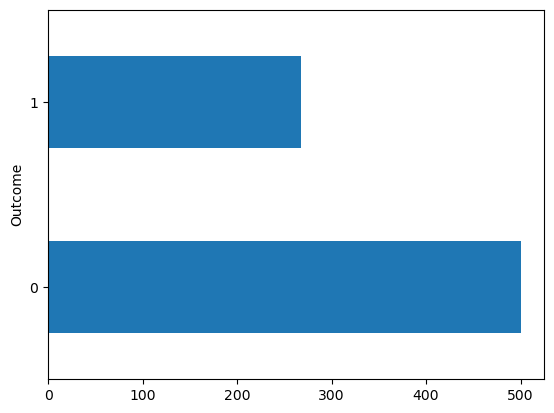

In [6]:
df["Outcome"].value_counts().plot.barh()

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
y = df["Outcome"]
X = df.drop(columns=["Outcome"], axis=1)

STATSMODEL

In [10]:
logistic = sm.Logit(y, X)
logistic_model = logistic.fit()
logistic_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Sat, 10 May 2025   Pseudo R-squ.:                 0.05922
Time:                        21:15:22   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

SCIKIT LEARN

In [11]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver='liblinear')
log_model = log.fit(X, y)
log_model.intercept_, log_model.coef_

(array([-5.89066097]),
 array([[ 1.17042030e-01,  2.83845263e-02, -1.68918562e-02,
          7.55581552e-04, -6.42379703e-04,  5.97597102e-02,
          6.76888410e-01,  7.23931450e-03]]))

predict and tuning

In [12]:
y_pred = log_model.predict(X)

In [14]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [15]:
accuracy_score(y, y_pred)

0.7747395833333334

In [18]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [21]:
log_model.predict(X)[0:10]


array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [20]:
log_model.predict_proba(X)[0:10]

array([[0.35045636, 0.64954364],
       [0.91700024, 0.08299976],
       [0.22480294, 0.77519706],
       [0.92135853, 0.07864147],
       [0.1674049 , 0.8325951 ],
       [0.79895254, 0.20104746],
       [0.88014921, 0.11985079],
       [0.27805284, 0.72194716],
       [0.32055182, 0.67944818],
       [0.92272181, 0.07727819]])

In [22]:
y_probs = log_model.predict_proba(X)[:, 1]
y_probs[0:10]

array([0.64954364, 0.08299976, 0.77519706, 0.07864147, 0.8325951 ,
       0.20104746, 0.11985079, 0.72194716, 0.67944818, 0.07727819])

In [28]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [29]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [30]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [31]:
accuracy_score(y, y_pred)

0.7747395833333334

In [32]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



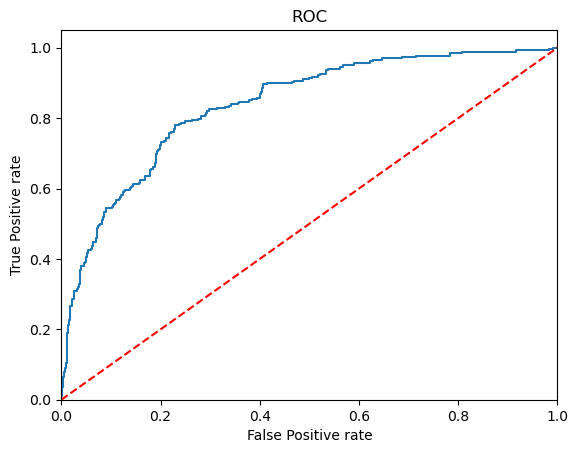

In [36]:
logit_roc_auc = roc_auc_score(y, log_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, log_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC')
plt.show()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic = LogisticRegression(solver='liblinear')
logistic_model = logistic.fit(X_train, y_train)
logistic_model.intercept_, logistic_model.coef_


(array([-5.81415307]),
 array([[ 0.06818803,  0.02565287, -0.01834471,  0.00176938, -0.00098342,
          0.06384551,  0.45663424,  0.02403764]]))

In [39]:
y_pred = logistic_model.predict(X_test)

accuracy_score(y_test, y_pred)

0.7597402597402597

In [42]:
cross_val_score(logistic_model, X_test, y_test, cv=10).mean() # most trustworthy data

0.7925